In [1]:
# Import CSV file

import pandas as pd

file_path = '/Users/peter/Downloads/layoffs.csv'

layoffs_raw = pd.read_csv(file_path)

# Check to see the file was imported properly
layoffs_raw.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0


## Part 1: Data Cleaning

In [2]:
# Create a copy of the original DataFrame 
layoffs_staging = layoffs_raw.copy()
layoffs_staging.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0


In [3]:
# Check data types of columns
layoffs_staging.dtypes

company                   object
location                  object
industry                  object
total_laid_off           float64
percentage_laid_off      float64
date                      object
stage                     object
country                   object
funds_raised_millions    float64
dtype: object

In [4]:
# Change the date column type from object to a datetime
layoffs_staging['date'] = pd.to_datetime(layoffs_staging['date'], format='%m/%d/%Y')
layoffs_staging.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Unknown,Brazil,788.0


In [5]:
# Check data types of columns once more
layoffs_staging.dtypes

company                          object
location                         object
industry                         object
total_laid_off                  float64
percentage_laid_off             float64
date                     datetime64[ns]
stage                            object
country                          object
funds_raised_millions           float64
dtype: object

In [6]:
# Check for duplicates
duplicate_rows = layoffs_staging.duplicated()
duplicated = layoffs_staging.loc[duplicate_rows]
duplicated

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
1492,Cazoo,London,Transportation,750.0,0.15,2022-06-07,Post-IPO,United Kingdom,2000.0
2357,Yahoo,SF Bay Area,Consumer,1600.0,0.20,2023-02-09,Acquired,United States,6.0
2358,Hibob,Tel Aviv,HR,70.0,0.30,2020-03-30,Series A,Israel,45.0
2359,Casper,New York City,Retail,NaN,NaN,2021-09-14,Post-IPO,United States,339.0
2360,Wildlife Studios,Sao Paulo,Consumer,300.0,0.20,2022-11-28,Unknown,Brazil,260.0


In [7]:
# Drop the duplicate rows
layoffs_staging = layoffs_staging.drop_duplicates()

In [8]:
# Run the check for duplicate rows again
duplicate_rows = layoffs_staging.duplicated()
duplicated = layoffs_staging.loc[duplicate_rows]
duplicated

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions


In [9]:
# Glance through to see whether there are errors or null values
layoffs_staging['location'].unique()

array(['Sydney', 'New York City', 'Ibadan', 'Mumbai', 'Sao Paulo',
       'SF Bay Area', 'Seattle', 'Boston', 'Blumenau', 'Pune',
       'Bengaluru', 'Los Angeles', 'Boise', 'Chicago', 'Paris',
       'Baton Rouge', 'Munich', 'Denver', 'Tel Aviv', 'Stockholm',
       'Orlando', 'Ann Arbor', 'Berlin', 'Vancouver', 'Washington D.C.',
       'London', 'San Antonio', 'St. Louis', 'Pittsburgh', 'Tokyo',
       'Lagos', 'Seoul', 'Chennai', 'Shenzen', 'Portland', 'Atlanta',
       'Albany', 'Milan', 'Singapore', 'Jakarta', 'Philadelphia',
       'Columbus', 'Tallinn', 'Phoenix', 'Toronto', 'Melbourne', 'Dublin',
       'Austin', 'New Delhi', 'Manchester', 'Miami', 'Helsinki',
       'Detroit', 'Frankfurt', 'Waterloo', 'Amsterdam', 'Barcelona',
       'Karlsruhe', 'Curitiba', 'Charlotte', 'Las Vegas', 'New Haven',
       'Montreal', 'Coimbra', 'Walldorf', 'Jersey City', 'Reno', 'Kiel',
       'Gurugram', 'Nashville', 'Mexico City', 'Oxford', 'Calgary',
       'Boulder', 'Wilmington', 'Cincinna

In [10]:
# One of the unique locations is set to 'Non-U.S.'
# Let's fix this
layoffs_staging.loc[layoffs_staging['location'] == 'Non-U.S.']

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
809,BitMEX,Non-U.S.,Crypto,NaN,0.30,2022-11-02,Seed,Seychelles,0.0
1642,BitMEX,Non-U.S.,Crypto,75.0,0.25,2022-04-04,Seed,Seychelles,0.0
1660,WeDoctor,Non-U.S.,Healthcare,500.0,NaN,2022-03-02,Series F,China,1400.0


In [11]:
# Change the location of 'BitMEX' to 'Victoria'
layoffs_staging.loc[layoffs_staging['company'] == 'BitMEX', 'location'] = 'Victoria'

In [12]:
# Check that it updated correctly
layoffs_staging.loc[layoffs_staging['company'] == 'BitMEX']

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
809,BitMEX,Victoria,Crypto,NaN,0.30,2022-11-02,Seed,Seychelles,0.0
1642,BitMEX,Victoria,Crypto,75.0,0.25,2022-04-04,Seed,Seychelles,0.0


In [13]:
# Change the location of 'WeDoctor' to 'Hangzhou'
layoffs_staging.loc[layoffs_staging['company'] == 'WeDoctor', 'location'] = 'Hangzhou'

In [14]:
# Check that it updated correctly
layoffs_staging.loc[layoffs_staging['company'] == 'WeDoctor']

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
1660,WeDoctor,Hangzhou,Healthcare,500.0,NaN,2022-03-02,Series F,China,1400.0


In [15]:
# Glance to see whether there are errors or null values
layoffs_staging['industry'].unique()

array(['Other', 'Media', 'Retail', 'Education', 'Real Estate',
       'Transportation', 'Marketing', nan, 'Healthcare', 'Security',
       'Food', 'Fitness', 'Consumer', 'Logistics', 'HR', 'Support',
       'Travel', 'Crypto', 'Finance', 'Data', 'Sales', 'Infrastructure',
       'Hardware', 'Product', 'Construction', 'Legal', 'Energy',
       'Manufacturing', 'Recruiting', 'Aerospace', 'Crypto Currency',
       'Fin-Tech', 'CryptoCurrency'], dtype=object)

In [16]:
# Find the companies that have 'industry' set as null
layoffs_staging.loc[layoffs_staging['industry'].isnull()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
8,Airbnb,SF Bay Area,NaN,30.0,NaN,2023-03-03,Post-IPO,United States,6400.0
330,Bally's Interactive,Providence,NaN,NaN,0.15,2023-01-18,Post-IPO,United States,946.0
736,Juul,SF Bay Area,NaN,400.0,0.30,2022-11-10,Unknown,United States,1500.0
1595,Carvana,Phoenix,NaN,2500.0,0.12,2022-05-10,Post-IPO,United States,1600.0


In [17]:
# Extract the name of the companies with 'industry' set to null as a list
null_industry_companies = list(layoffs_staging.loc[layoffs_staging['industry'].isnull(), 'company'])
null_industry_companies

['Airbnb', "Bally's Interactive", 'Juul', 'Carvana']

In [18]:
# Create a loop to fill in the 'industry' type based on other records of the same company
for company in null_industry_companies:
    filtered_data = layoffs_staging.loc[layoffs_staging['company'] == company, 'industry']
    no_null_industry = filtered_data.dropna()
    if not no_null_industry.empty:
        industry_value = no_null_industry.iloc[0]
        layoffs_staging.loc[(layoffs_staging['company'] == company) &\
                           (layoffs_staging['industry'].isnull()), 'industry'] = industry_value
  

In [19]:
# Check the outcome
layoffs_staging.loc[layoffs_staging['industry'].isnull()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
330,Bally's Interactive,Providence,NaN,NaN,0.15,2023-01-18,Post-IPO,United States,946.0


In [20]:
# Fill "Bally's Interactive" industry type manually, based on research
layoffs_staging.loc[layoffs_staging['company'] == "Bally's Interactive", 'industry'] = 'Entertainment'

In [21]:
# Check again
layoffs_staging.loc[layoffs_staging['industry'].isnull()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions


In [22]:
# Glance to see whether there are errors or null values
layoffs_staging['country'].unique()

array(['Australia', 'United States', 'Nigeria', 'India', 'Brazil',
       'United States.', 'France', 'Germany', 'Israel', 'Sweden',
       'United Kingdom', 'Japan', 'South Korea', 'China', 'Italy',
       'Singapore', 'Indonesia', 'Estonia', 'Canada', 'Ireland',
       'Finland', 'Netherlands', 'Spain', 'Portugal', 'Chile', 'Colombia',
       'Argentina', 'Seychelles', 'Austria', 'Mexico', 'Switzerland',
       'Egypt', 'Kenya', 'Luxembourg', 'Greece', 'Poland', 'Norway',
       'Belgium', 'Denmark', 'Hong Kong', 'New Zealand', 'Malaysia',
       'Hungary', 'Vietnam', 'Thailand', 'Lithuania', 'Ghana', 'Senegal',
       'Pakistan', 'United Arab Emirates', 'Peru', 'Bahrain', 'Romania',
       'Turkey', 'Russia', 'Uruguay', 'Bulgaria', 'South Africa',
       'Czech Republic', 'Myanmar'], dtype=object)

In [23]:
# There are two "United States", with one having a period at the end.
layoffs_staging['country'] = layoffs_staging['country'].replace({'United States.': 'United States'})

In [24]:
# Check again
layoffs_staging['country'].unique()

array(['Australia', 'United States', 'Nigeria', 'India', 'Brazil',
       'France', 'Germany', 'Israel', 'Sweden', 'United Kingdom', 'Japan',
       'South Korea', 'China', 'Italy', 'Singapore', 'Indonesia',
       'Estonia', 'Canada', 'Ireland', 'Finland', 'Netherlands', 'Spain',
       'Portugal', 'Chile', 'Colombia', 'Argentina', 'Seychelles',
       'Austria', 'Mexico', 'Switzerland', 'Egypt', 'Kenya', 'Luxembourg',
       'Greece', 'Poland', 'Norway', 'Belgium', 'Denmark', 'Hong Kong',
       'New Zealand', 'Malaysia', 'Hungary', 'Vietnam', 'Thailand',
       'Lithuania', 'Ghana', 'Senegal', 'Pakistan',
       'United Arab Emirates', 'Peru', 'Bahrain', 'Romania', 'Turkey',
       'Russia', 'Uruguay', 'Bulgaria', 'South Africa', 'Czech Republic',
       'Myanmar'], dtype=object)

In [25]:
layoffs_staging.head(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Unknown,Brazil,788.0
5,Embark Trucks,SF Bay Area,Transportation,230.0,0.70,2023-03-03,Post-IPO,United States,317.0
6,Lendi,Sydney,Real Estate,100.0,NaN,2023-03-03,Unknown,Australia,59.0
7,UserTesting,SF Bay Area,Marketing,63.0,NaN,2023-03-03,Acquired,United States,152.0
8,Airbnb,SF Bay Area,Travel,30.0,NaN,2023-03-03,Post-IPO,United States,6400.0
9,Accolade,Seattle,Healthcare,NaN,NaN,2023-03-03,Post-IPO,United States,458.0


In [26]:
# Check null values for total_laid_off and percentage_laid_off
layoffs_staging.loc[(layoffs_staging['total_laid_off'].isnull()) &\
                    (layoffs_staging['percentage_laid_off'].isnull())]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
9,Accolade,Seattle,Healthcare,NaN,NaN,2023-03-03,Post-IPO,United States,458.0
10,Indigo,Boston,Other,NaN,NaN,2023-03-03,Series F,United States,1200.0
16,Flipkart,Bengaluru,Retail,NaN,NaN,2023-03-02,Acquired,India,12900.0
18,Truckstop.com,Boise,Logistics,NaN,NaN,2023-03-02,Acquired,United States,NaN
57,Arch Oncology,St. Louis,Healthcare,NaN,NaN,2023-02-22,Series C,United States,155.0
...,...,...,...,...,...,...,...,...,...
2323,SpotHero,Chicago,Transportation,NaN,NaN,2020-03-24,Series D,United States,117.0
2334,Zwift,Los Angeles,Fitness,NaN,NaN,2020-03-23,Series B,United States,164.0
2340,Vacasa,Portland,Travel,NaN,NaN,2020-03-20,Series C,United States,526.0
2345,Anyvision,Tel Aviv,Security,NaN,NaN,2020-03-19,Series A,Israel,74.0


In [27]:
# Drop rows containing null values for both
layoffs_staging = layoffs_staging.drop(
                    layoffs_staging.loc[(layoffs_staging['total_laid_off'].isnull()) &\
                    (layoffs_staging['percentage_laid_off'].isnull())].index
)

In [28]:
# Double check
layoffs_staging.loc[(layoffs_staging['total_laid_off'].isnull()) &\
                    (layoffs_staging['percentage_laid_off'].isnull())]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions


In [29]:
# Reading in a CSV file with data that was scraped from "Companies Market Cap"
# This file contains the top 100 tech companies.

tech_companies_df = pd.read_csv('top_tech_companies.csv')
tech_companies_df

,Company,Employees,Price,Percentage Change,Country
0,Amazon,"1,500,000",$190.74,1.45%,USA
1,Foxconn (Hon Hai Precision Industry),"826,608",$5.26,0.59%,Taiwan
2,Jingdong Mall,"450,679",$32.27,1.00%,China
3,IBM,"288,300",$166.42,1.07%,USA
4,Panasonic,"232,527",$8.90,1.28%,Japan
...,...,...,...,...,...
95,ServiceNow,"20,433",$725.66,0.64%,USA
96,Xerox,"20,100",$13.64,1.34%,USA
97,Broadcom,"20,000","$1,308",1.34%,USA
98,United Microelectronics,"20,000",$7.94,0.69%,Taiwan


In [30]:
# Take the "Company" column and turn into a list
tech_companies_list = tech_companies_df['Company'].tolist()

# Do the same for the 'company' column of the original 'layoffs_staging' dataframe.
layoffs_staging_companies_list = layoffs_staging['company'].tolist()

In [31]:
# Run a For Loop to update the industry type to "Technology" if companies in 'layoffs_staging' is in tech_companies_list

for company in tech_companies_list:
    if company in layoffs_staging_companies_list:
        layoffs_staging.loc[layoffs_staging['company'] == company, 'industry'] = 'Technology'
        
# Check if update was successful
layoffs_staging.loc[layoffs_staging['industry'] == 'Technology']

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
39,Ericsson,Stockholm,Technology,8500.0,0.0800,2023-02-24,Post-IPO,Sweden,663.0
73,HP,Tel Aviv,Technology,100.0,NaN,2023-02-19,Post-IPO,Israel,4200.0
74,Tencent,Shenzen,Technology,300.0,NaN,2023-02-17,Post-IPO,China,12600.0
148,Dell,Austin,Technology,6650.0,0.0500,2023-02-06,Post-IPO,United States,NaN
197,PayPal,SF Bay Area,Technology,2000.0,0.0700,2023-01-31,Post-IPO,United States,216.0
209,OpenText,Waterloo,Technology,NaN,0.0800,2023-01-31,Post-IPO,Canada,1100.0
214,Intel,SF Bay Area,Technology,343.0,NaN,2023-01-30,Post-IPO,United States,12.0
216,Delivery Hero,Berlin,Technology,156.0,0.0400,2023-01-30,Post-IPO,Germany,9900.0
239,SAP,Walldorf,Technology,3000.0,0.0300,2023-01-26,Post-IPO,Germany,1300.0
245,IBM,New York City,Technology,3900.0,0.0200,2023-01-25,Post-IPO,United States,NaN


In [32]:
# Identifying companies categorized under the 'Technology' industry.
# Note: Some companies in the dataframe might be incorrectly categorized under other industries.
# Additionally, many companies may operate in multiple industries.
# The industry categorization here is for general reference.

layoffs_staging.loc[layoffs_staging['industry'] == 'Technology', 'company'].unique()

array(['Ericsson', 'HP', 'Tencent', 'Dell', 'PayPal', 'OpenText', 'Intel',
       'Delivery Hero', 'SAP', 'IBM', 'Microsoft', 'Amazon', 'Salesforce',
       'Amdocs', 'Adobe', 'Cisco', 'Oracle', 'Uber', 'Tesla'],
      dtype=object)

In [33]:
# DataFrame Overview
layoffs_staging

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Unknown,Brazil,788.0
...,...,...,...,...,...,...,...,...,...
2352,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
2353,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
2354,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
2355,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0


In [34]:
# There are still a significant amount of null values in the dataset
# Still, this will be used for the exploratory analysis phase.
layoffs_staging.count()

company                  1995
location                 1995
industry                 1995
total_laid_off           1617
percentage_laid_off      1572
date                     1994
stage                    1990
country                  1995
funds_raised_millions    1830
dtype: int64

In [35]:
layoffs_staging.describe()

,total_laid_off,percentage_laid_off,funds_raised_millions
count,1617.000000,1572.000000,1830.000000
mean,237.265925,0.258033,875.107517
std,769.807209,0.255875,6024.144762
min,3.000000,0.000000,0.000000
25%,36.000000,0.100000,51.000000
50%,80.000000,0.170000,162.500000
75%,180.000000,0.300000,450.750000
max,12000.000000,1.000000,121900.000000


## Part 2: Exploratory Data Analysis with 'layoffs_staging' DataFrame with missing values.

##### Top 10 Countries with the most Layoffs

In [36]:
layoffs_location = layoffs_staging.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(10)
layoffs_location

country
United States     256559.0
India              35993.0
Netherlands        17220.0
Sweden             11264.0
Brazil             10391.0
Germany             8701.0
United Kingdom      6398.0
Canada              6319.0
Singapore           5995.0
China               5905.0
Name: total_laid_off, dtype: float64

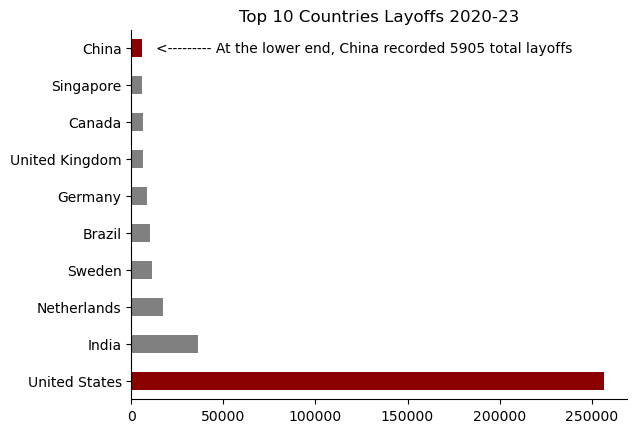

In [37]:
import matplotlib.pyplot as plt

layoffs_location.plot(kind='barh', color='grey')

specific_countries = ['United States', 'China']
for country in specific_countries:
    plt.gca().patches[layoffs_location.index.get_loc(country)].set_facecolor('darkred')  

plt.title('Top 10 Countries Layoffs 2020-23')
plt.xticks(rotation=0)
plt.ylabel('')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.text(0.05,0.94,"<--------- At the lower end, China recorded 5905 total layoffs"
         , fontsize=10, transform=plt.gca().transAxes)

plt.show()

##### Top 10 Companies with the most Layoffs

In [38]:
layoffs_companies = layoffs_staging.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head(10)
layoffs_companies

company
Amazon         18150.0
Google         12000.0
Meta           11000.0
Salesforce     10090.0
Microsoft      10000.0
Philips        10000.0
Ericsson        8500.0
Uber            7585.0
Dell            6650.0
Booking.com     4601.0
Name: total_laid_off, dtype: float64

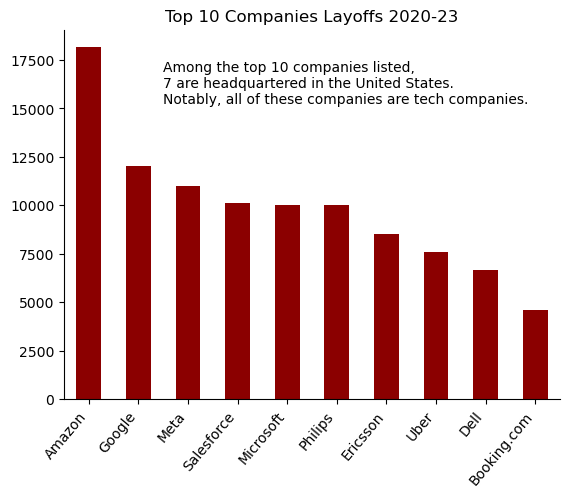

In [39]:
layoffs_companies.plot(kind='bar', color='darkred')
plt.title('Top 10 Companies Layoffs 2020-23')
plt.xticks(rotation=50, ha='right')
plt.xlabel('')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.text(0.2,0.8, """Among the top 10 companies listed, 
7 are headquartered in the United States. 
Notably, all of these companies are tech companies.""", fontsize=10, transform=plt.gca().transAxes)
plt.show()

In [40]:
layoffs_industries = layoffs_staging.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)
layoffs_industries

industry
Technology        76558.0
Consumer          44882.0
Finance           26261.0
Transportation    26163.0
Healthcare        25953.0
Retail            25463.0
Food              22299.0
Real Estate       17565.0
Travel            17159.0
Other             14589.0
Name: total_laid_off, dtype: float64

In [41]:
len(layoffs_industries)

10

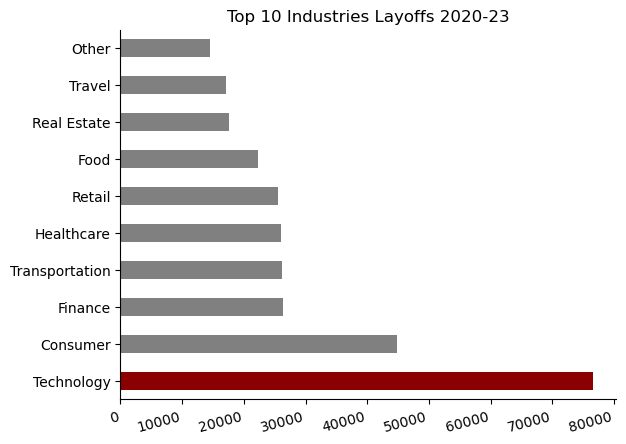

In [42]:
layoffs_industries.plot(kind='barh', color='grey')
plt.gca().patches[layoffs_industries.index.get_loc('Technology')].set_facecolor('darkred')
plt.title('Top 10 Industries Layoffs 2020-23')
plt.xticks(rotation=15, ha='right')
plt.ylabel('')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

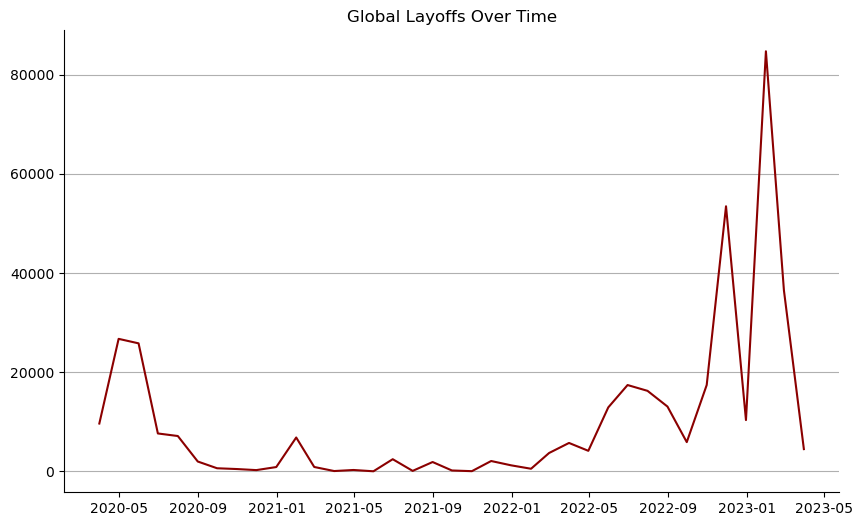

In [43]:
monthly_totals = layoffs_staging.resample('M', on='date').sum(numeric_only=True)

plt.figure(figsize=(10,6))
plt.plot(monthly_totals.index, monthly_totals['total_laid_off'], color='darkred', linestyle='-')
plt.title('Global Layoffs Over Time')
plt.grid(axis='y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

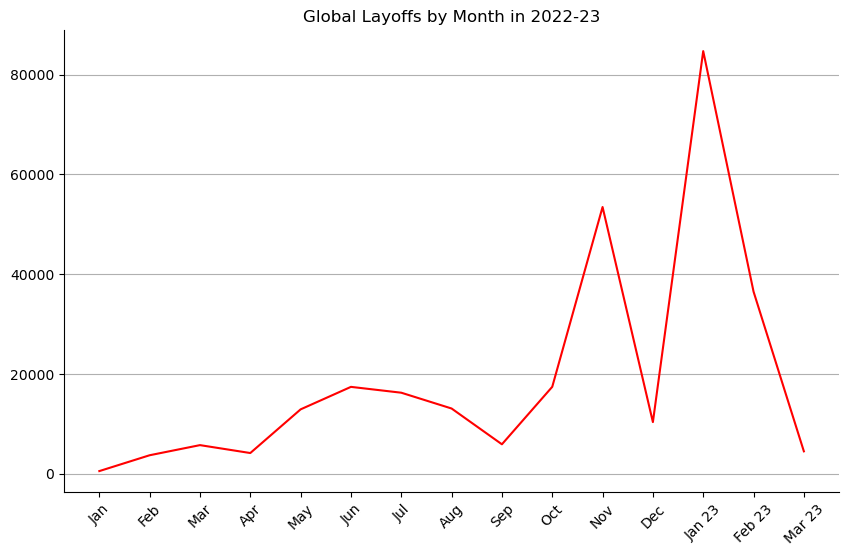

In [44]:
# Plotting the line chart
layoffs_2022_23 = layoffs_staging.loc[(layoffs_staging['date'].dt.year == 2022) |\
                                      (layoffs_staging['date'].dt.year == 2023)]
layoffs_months_2022_23 = layoffs_2022_23.groupby([layoffs_2022_23['date'].dt.year,\
                                                layoffs_2022_23['date'].dt.month])['total_laid_off'].sum()
plt.figure(figsize=(10,6))
layoffs_months_2022_23.plot(kind='line', color='red')
plt.title('Global Layoffs by Month in 2022-23')
plt.grid(axis='y')
plt.xlabel('')
custom_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', "Jan 23",  "Feb 23", 'Mar 23']
plt.xticks(range(len(layoffs_months_2022_23)), custom_labels, rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
